In [2]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

11501568/11490434 [==============================] - 0s 0us/step


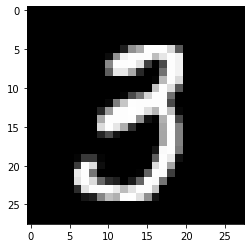

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape não é mais necessario:
# train_images = train_images.reshape((60000, 28*28))

# normalização dos pixels entre [0, 1]
train_images = train_images / 255
test_images = test_images / 255

digit = np.random.randint(60000)

plt.figure()
plt.imshow(train_images[digit], cmap='gray')
plt.show()

# Conversão dos rótulos em One-Hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[digit]

In [4]:
## Função auxiliar para imprimir as curvas de treino
def print_curva(H):
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    plt.plot(H.history['loss'], label='loss')
    plt.plot(H.history['val_loss'], label='val_loss')
    plt.legend()
    plt.title('loss')

    plt.subplot(1,2,2)
    plt.plot(H.history['accuracy'], label='acc')
    plt.plot(H.history['val_accuracy'], label='val_acc')
    plt.legend()
    plt.title('Acc')
    plt.show()

# Camadas de convolução 2D

Os reshape que aplicamos nos dados quando tinhamos comadas Dense eram necessários para transformar a imagem em vetores de pixels:
```
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))
```

Com as camadas de convolução 2D esse reshape não é necessário, 
pois a camada recebe como entrada uma matriz (ou imagem) e não um vetor.

![convolution](https://aigeekprogrammer.com/wp-content/uploads/2019/12/CNN-filter-animation-1.gif)

![RGB](https://predictiveprogrammer.com/wp-content/uploads/2018/06/convolve.gif)

![filters](https://lh3.googleusercontent.com/proxy/EFnO2GaDL8j9LXjyrOA2t5EZ_eWdpxQEvHCiUtjBv4fhZivRuevDxw9dHsg71Y4F02Tl5Dpu5mkr8S6HcccerwxWrOv5hz9lWaXAwByuzxjAPzg)

In [5]:
from keras import models, layers

inputs = layers.Input(shape=(28,28,1))

x = layers.Conv2D(16, (3,3), activation='relu' )(inputs)

x = layers.Conv2D(32, (3,3), activation='relu' )(x)

x = layers.Flatten()(x)

out = layers.Dense(10, activation='softmax')(x)

modelito = keras.Model(inputs=[inputs], outputs=[out])

modelito.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                184330    
Total params: 189,130
Trainable params: 189,130
Non-trainable params: 0
_________________________________________________________________


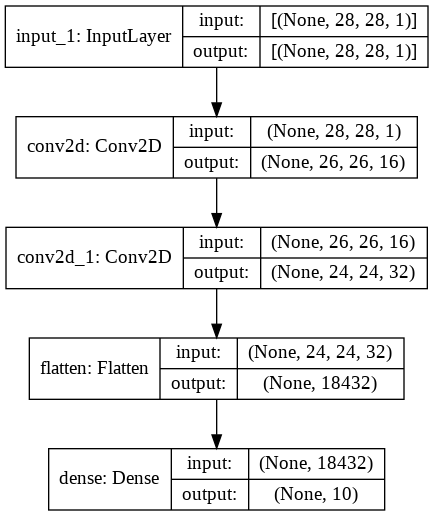

In [7]:
from tensorflow.keras.utils import plot_model

plot_model(modelito, show_shapes=True)

In [8]:
modelito.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

H = modelito.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2 )

Epoch 1/10
375/375 [==============================] - 44s 7ms/step - loss: 0.4252 - accuracy: 0.8695 - val_loss: 0.0848 - val_accuracy: 0.9749
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0748 - accuracy: 0.9775 - val_loss: 0.0675 - val_accuracy: 0.9809
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0500 - accuracy: 0.9854 - val_loss: 0.0596 - val_accuracy: 0.9819
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0387 - accuracy: 0.9884 - val_loss: 0.0634 - val_accuracy: 0.9819
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0310 - accuracy: 0.9913 - val_loss: 0.0570 - val_accuracy: 0.9844
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0238 - accuracy: 0.9931 - val_loss: 0.0527 - val_accuracy: 0.9860
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0190 - accuracy: 0.9945 - val_loss: 0.0566 - val_accuracy: 0.9859
Epoch

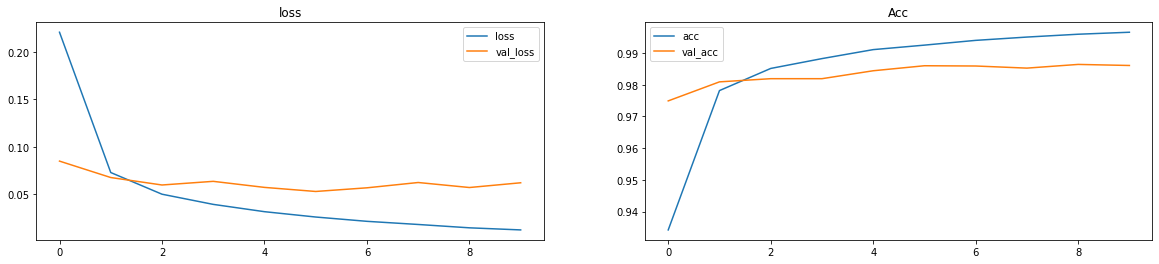

313/313 [==============================] - 1s 2ms/step - loss: 0.0514 - accuracy: 0.9860


In [9]:
print_curva(H)

test_loss, test_acc = modelito.evaluate(test_images, test_labels)

### Adicionando padding para manter os features maps com o mesmo tamanho que a matriz de entrada na camada convolucional

![padding](https://miro.medium.com/max/790/1*1okwhewf5KCtIPaFib4XaA.gif "Conv2D")

In [10]:
inputs = layers.Input(shape=(28,28,1))

x = layers.Conv2D(16, (3,3), padding='same', activation='relu' )(inputs)

x = layers.Conv2D(32, (3,3), padding='same', activation='relu' )(x)

x = layers.Flatten()(x)

out = layers.Dense(10, activation='softmax')(x)

modelito = keras.Model(inputs=[inputs], outputs=[out])

modelito.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                250890    
Total params: 255,690
Trainable params: 255,690
Non-trainable params: 0
_________________________________________________________________


## Camada de Max Pooling

- Max Pooling
- Average Pooling

![max](https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png)



In [11]:
inputs = layers.Input(shape=(28,28,1))

x = layers.Conv2D(16, (3,3), activation='relu' )(inputs)

x = layers.MaxPool2D()(x)

x = layers.Conv2D(32, (3,3), activation='relu' )(x)

# x = layers.MaxPool2D()(x)
x = layers.AveragePooling2D()(x)

x = layers.Flatten()(x)

out = layers.Dense(10, activation='softmax')(x)

modelito = keras.Model(inputs=[inputs], outputs=[out])

modelito.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
average_pooling2d (AveragePo (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                8010

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 0.7910 - accuracy: 0.7754 - val_loss: 0.1756 - val_accuracy: 0.9508
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1575 - accuracy: 0.9525 - val_loss: 0.1100 - val_accuracy: 0.9687
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0997 - accuracy: 0.9700 - val_loss: 0.0880 - val_accuracy: 0.9752
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0817 - accuracy: 0.9751 - val_loss: 0.0825 - val_accuracy: 0.9766
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0715 - accuracy: 0.9789 - val_loss: 0.0708 - val_accuracy: 0.9787
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0651 - accuracy: 0.9805 - val_loss: 0.0647 - val_accuracy: 0.9813
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0590 - accuracy: 0.9823 - val_loss: 0.0600 - val_accuracy: 0.9827
Epoch 

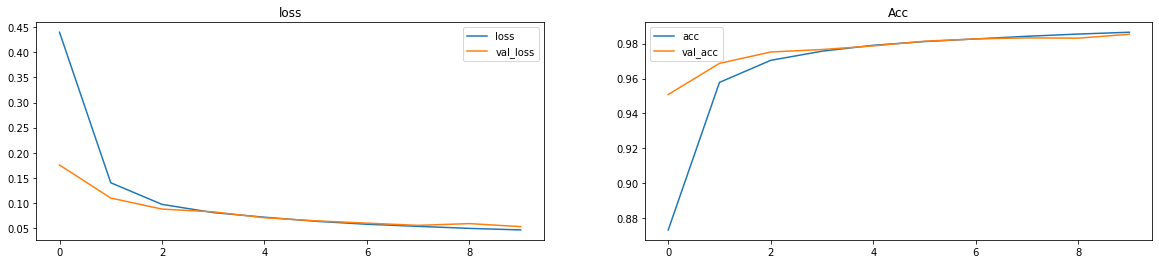

In [12]:
modelito.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

H = modelito.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2 )

print_curva(H)

Para subistituir o Flatten (reshape) podemos usar:
- Global Max Pooling
- Global Average Pooling

![global](https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-3-030-34113-8_22/MediaObjects/491550_1_En_22_Fig1_HTML.png)

In [50]:
inputs = layers.Input(shape=(28,28,1))

x = layers.Conv2D(16, (3,3), activation='relu' )(inputs)

x = layers.MaxPool2D()(x)

x = layers.Conv2D(32, (3,3), activation='relu' )(x)

x = layers.MaxPool2D()(x)

x = layers.GlobalMaxPool2D()(x)
# x = layers.GlobalAveragePooling2D()(x)

out = layers.Dense(10, activation='softmax')(x)

modelito = keras.Model(inputs=[inputs], outputs=[out])

modelito.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_53 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_142 (Conv2D)          (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                330 

Epoch 1/20
375/375 [==============================] - 3s 5ms/step - loss: 1.8045 - accuracy: 0.5126 - val_loss: 0.5286 - val_accuracy: 0.8687
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.4621 - accuracy: 0.8715 - val_loss: 0.3103 - val_accuracy: 0.9075
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3072 - accuracy: 0.9059 - val_loss: 0.2440 - val_accuracy: 0.9247
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2492 - accuracy: 0.9212 - val_loss: 0.2330 - val_accuracy: 0.9263
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2226 - accuracy: 0.9309 - val_loss: 0.2042 - val_accuracy: 0.9357
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1960 - accuracy: 0.9375 - val_loss: 0.1856 - val_accuracy: 0.9408
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1785 - accuracy: 0.9445 - val_loss: 0.1628 - val_accuracy: 0.9492
Epoch 

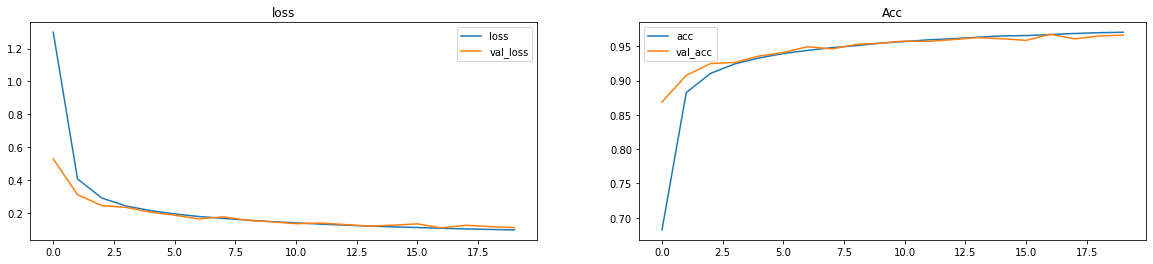

In [14]:
modelito.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

H = modelito.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2 )

print_curva(H)

# Atividade

Criar e treinar a arquitetura da imagem.

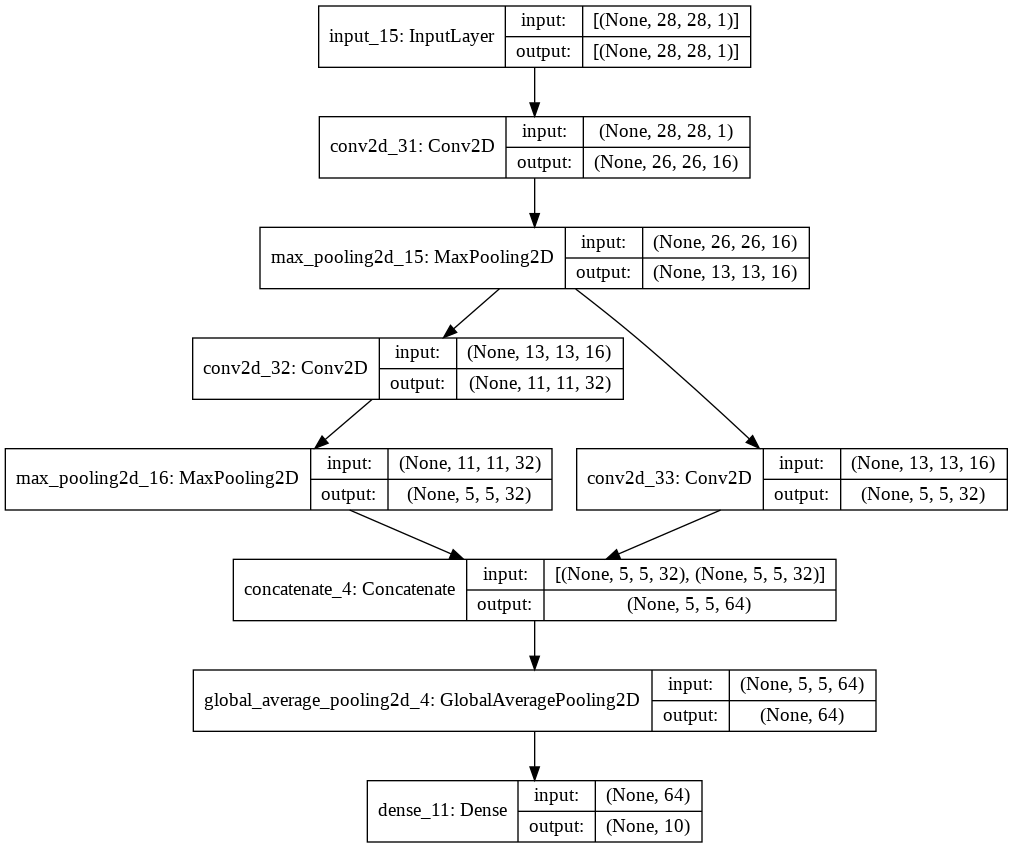

Dica: o ramo da direita tem um kernel de tamanho maior e um stride diferente....

In [97]:
inputs = layers.Input(shape=(28,28,1 ))

x = layers.Conv2D(16, (3,3), activation='relu' )(inputs)

x = layers.MaxPool2D()(x)

y = x

y = layers.Conv2D(32, (9,9), activation='relu' )(x)

x = layers.Conv2D(32, (3,3), activation='relu' )(x)

x = layers.MaxPool2D()(x)

x = layers.Concatenate()([x,y])

x = layers.GlobalAveragePooling2D()(x)




out = layers.Dense(10, activation='softmax')(x)

model2 = keras.Model(inputs=[inputs], outputs=[out], name="mnits_model")

model2.summary()

Model: "mnits_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_113 (InputLayer)          [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_341 (Conv2D)             (None, 26, 26, 16)   160         input_113[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_106 (MaxPooling2D (None, 13, 13, 16)   0           conv2d_341[0][0]                 
__________________________________________________________________________________________________
conv2d_343 (Conv2D)             (None, 11, 11, 32)   4640        max_pooling2d_106[0][0]          
________________________________________________________________________________________

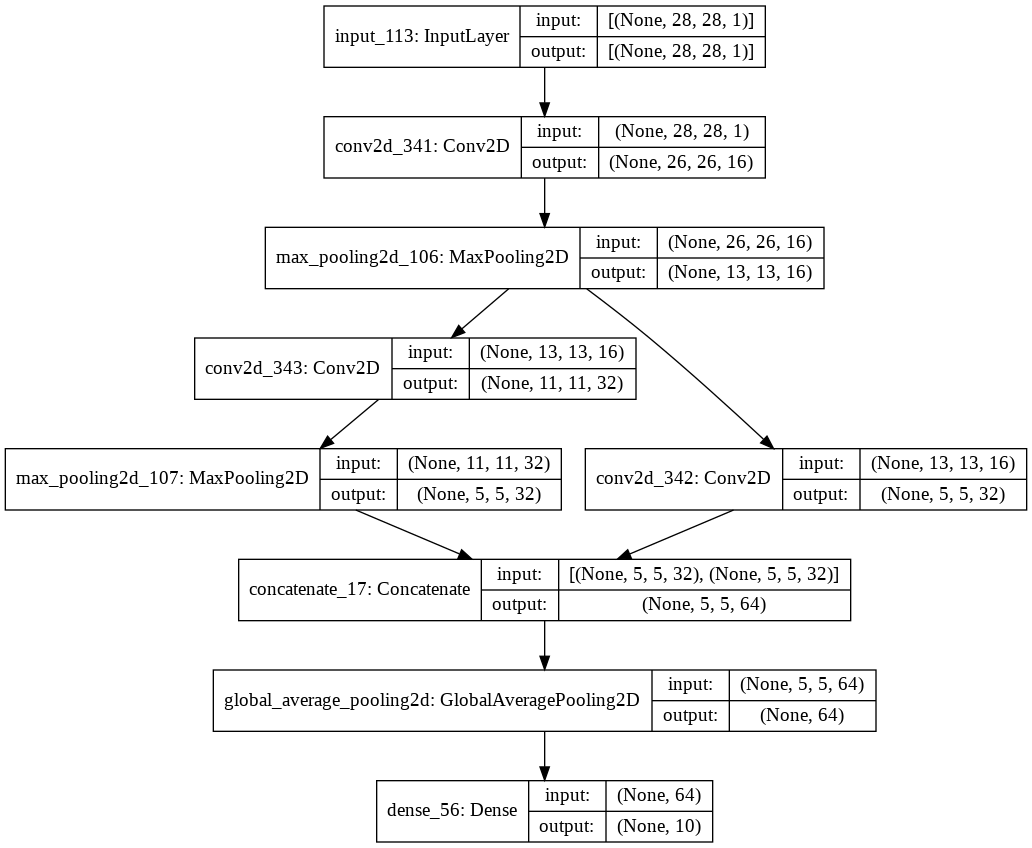

In [100]:
plot_model(model2, show_shapes=True)

Epoch 1/20
375/375 [==============================] - 4s 5ms/step - loss: 1.2600 - accuracy: 0.6211 - val_loss: 0.3613 - val_accuracy: 0.8922
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3578 - accuracy: 0.8884 - val_loss: 0.2148 - val_accuracy: 0.9354
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2292 - accuracy: 0.9294 - val_loss: 0.1530 - val_accuracy: 0.9557
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1698 - accuracy: 0.9480 - val_loss: 0.1302 - val_accuracy: 0.9614
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1358 - accuracy: 0.9596 - val_loss: 0.1234 - val_accuracy: 0.9607
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1213 - accuracy: 0.9632 - val_loss: 0.0880 - val_accuracy: 0.9746
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1037 - accuracy: 0.9703 - val_loss: 0.0953 - val_accuracy: 0.9721
Epoch 

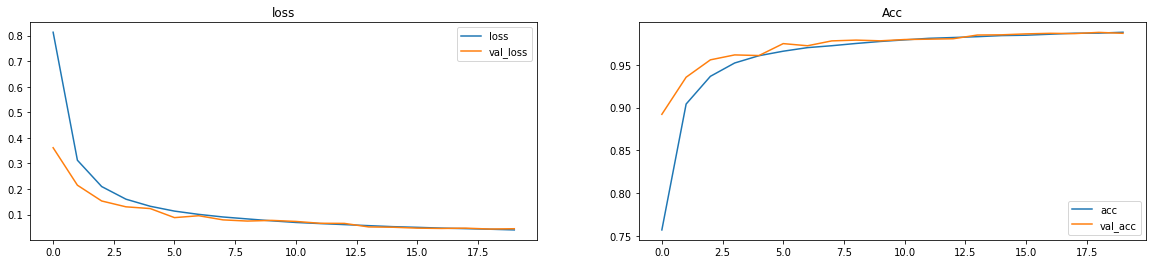

In [101]:
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

H = model2.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2 )

print_curva(H)